# Proyecto: Análisis de mercado inmobiliario

Creado por: Vanesa Flores

## Objetivo

Crear un modelo Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.


### 1. Pensando como un/a Data Scientist
Algunos datos que considero me ayudarían a trabajar sobre el problema serían:

1. Ubicación de la propiedad.
2. Tipo de propiedad (Casa, Departamento, PH,...)
3. Metros cuadrados que conforman la propiedad.
4. Precio por metro cuadrado.
5. Número de ambientes.
6. Número de baños.
7. Si posee o no estacionamiento.
8. Accesibilidad (Colectivos, subte, tren,...)
9. Cercanías.

En principio, considero la importancia de los datos en el orden en el que están escritos. Siendo el más importante la ubicación y por último las cercanías. Quizás con estos datos podremos crear un modelo que ayude a predecir el precio de venta de una propiedad observando las relaciones entre ellos.   


### 2. Análisis Exploratorio de Datos

En este segundo paso empezaremos con el análisis exploratorio de los datos, con el fin de conocer la información que los datos nos están ofrecienciendo y de ésta forma ver cómo nos ayudarían a armar nuestro modelo Machine Learning.


* Empezamos importando las librerías que nos ayudarán a trabajar con los datos. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Cargamos el dataset utilizando Pandas.

In [2]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print('El número de filas y columnas que tiene es:', data.shape)
data.head()

El número de filas y columnas que tiene es: (146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


Se observa que contamos con un dataset bastante grande; con 19 columnas que nos muestran las características de los anuncios de 146.660 propiedades que están en oferta en la ciudad de Buenos Aires, Argentina.

* Miremos ahora valor faltaltantes

In [3]:
print('Nombre de las columnas:', data.columns)
faltantes=data.isna().sum()
print('Valores faltantes por columnas:', faltantes) 

Nombre de las columnas: Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
Valores faltantes por columnas: start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


Se puede ver que existen columnas con una cantidad considerable de valores faltantes en nuestro dataset. Esto pudiese sugerir que debamos tratar estas instancias con nulos de alguna manera más adelante.

Como nos insteresa conocer las relaciones entre las características de las propiedades y NO la características de los anuncios, en lo que sigue se eliminarán algunas colunmas como ('start_date', 'end_date', 'created_on','title', 'description')

Además también se eliminarán las columnas relacionadas a la ubicación geográfica ('lat', 'lon') ya que parecen ser variables que no nos están diciendo mucho sobre el valor de una propiedad.

In [4]:
moneda=pd.unique(data['currency'])
print('Moneda:',moneda)
tipo_operacion=pd.unique(data['operation_type'])
print('Tipo de operación:',tipo_operacion)
pais=pd.unique(data['l1'])
print('País:', pais)

Moneda: ['USD']
Tipo de operación: ['Venta']
País: ['Argentina']


Por último, eliminaremos también las columnas ('currency', 'operation_type', 'l1') ya que con el código anterior confirmamos poseen una única variación. Siendo la moneda "USD", el tipo de operación "Venta" y todos los anuncios corresponden a "Argentina".

* Filtrado de columnas

In [5]:
df=data.drop(columns=['lat', 'lon', 'start_date', 'end_date', 'created_on','title', 'description', 'currency','operation_type','l1'])
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


Las variables l2 y l3 representan la provincia y el barrio en donde se encuentra la propiedad. Por lo que para un mejor manejo en el desarrollo del trabajo las renombraremos.

In [6]:
df= df.rename(columns={'l2':'provincia','l3':'barrio'})
df.head()
corr_0=df.corr()

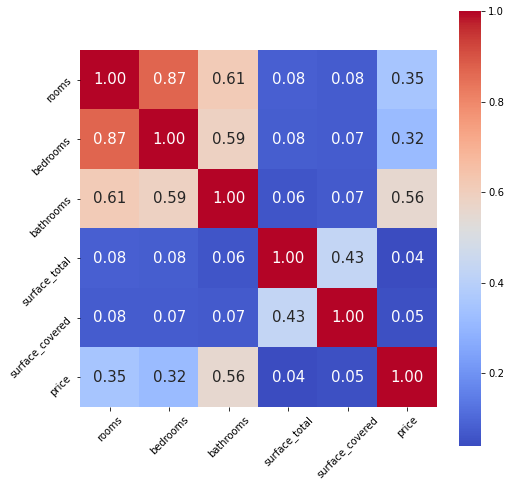

In [7]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr_0, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

* Veamos ahora qué tipos de propiedad hay publicados y cuántos por cada tipo.

In [8]:
#Tipos de propiedad en el dataset:
tipos=pd.unique(df['property_type'])
print('Tipos de Propiedad:',tipos)



#Cantidad de instancias por cada tipo de propiedad:
print(df.groupby(['property_type']).size())


Tipos de Propiedad: ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64


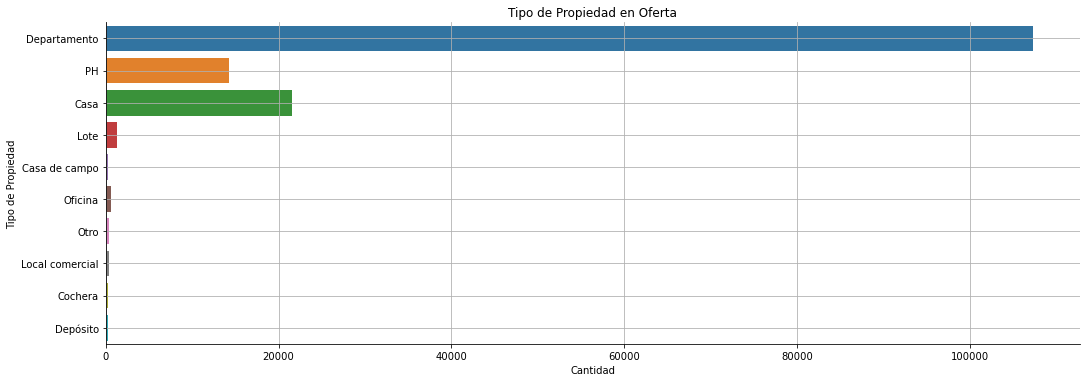

In [9]:
#Gráfico de barras para "Property_Type" 
ax=sns.catplot(data=df, y='property_type', kind='count', aspect=3)
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Propiedad")
plt.title("Tipo de Propiedad en Oferta")
plt.grid()
plt.show()
ax.savefig("tipo_propiedad_oferta.png")

<AxesSubplot:ylabel='property_type'>

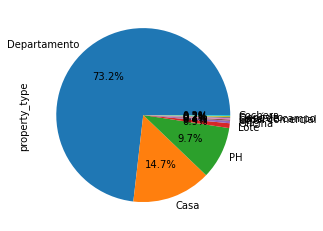

In [10]:
#OJO arreglar
tipos=df.property_type.value_counts()
tipos.plot.pie(autopct='%1.1f%%')

Con los gráficos anteriores es posible observar que los tipos de propiedad más ofertados en properati son: Departamento (73.2%), Casa (14.7%) y PH (9.7%), mientras que los demás representan apenas un 2.4% de nuestros datos.

También podemos observar a qué provincia y barrio pertenecen éstas publicaciones.

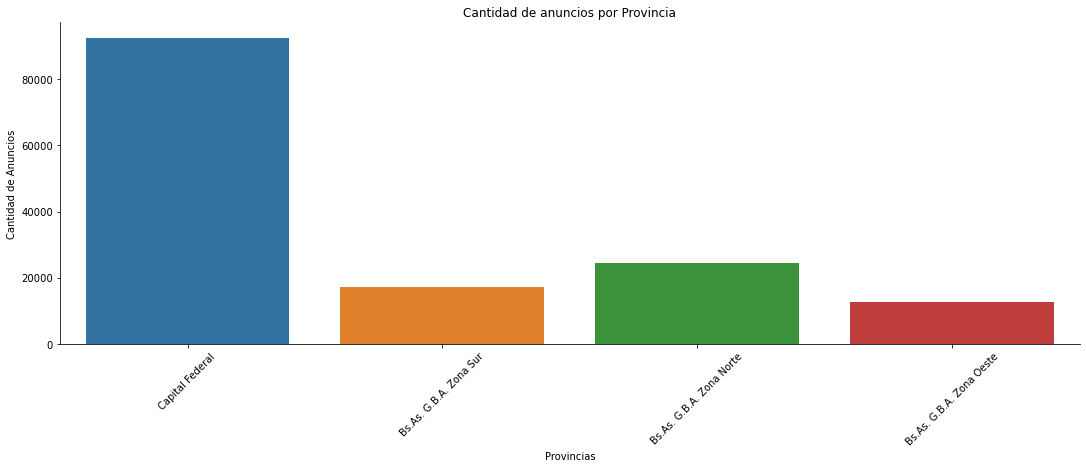

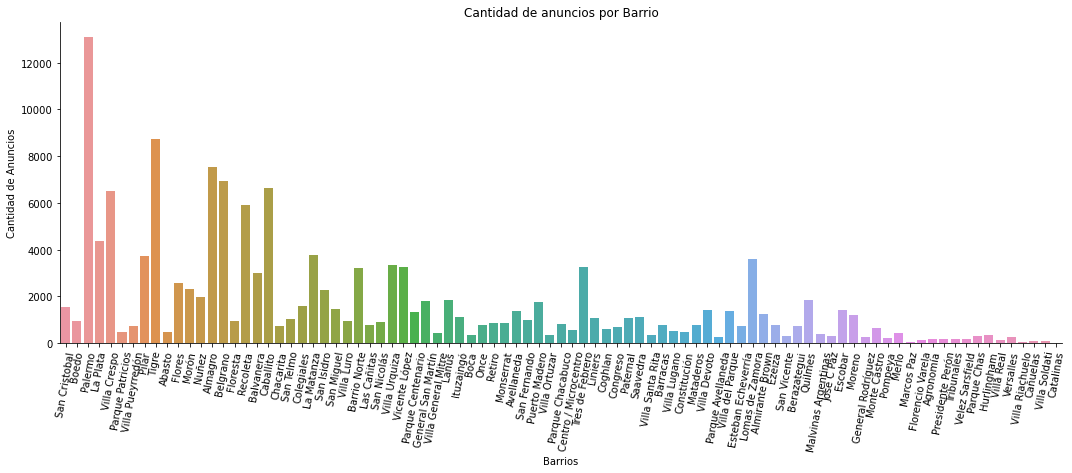

In [11]:
#Gráfico para observar cantidad de anuncios por Provincia
ax1=sns.catplot(data=df, x='provincia', kind='count', aspect=3)
plt.title('Cantidad de anuncios por Provincia')      
plt.xlabel('Provincias')  
plt.ylabel('Cantidad de Anuncios')  
plt.xticks(rotation=45)
plt.show()
ax1.savefig("cant_anuncios_provincia.png")
##############
#Gráfico para observar cantidad de anuncios por Barrio
ax2=sns.catplot(data=df, x='barrio', kind='count', aspect=3)
plt.title('Cantidad de anuncios por Barrio')      
plt.xlabel('Barrios')  
plt.ylabel('Cantidad de Anuncios')  
plt.xticks(rotation=80)
plt.show()
ax2.savefig("cant_anuncios_barrio.png")

In [12]:
provincias=df.provincia.value_counts()
provincias

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: provincia, dtype: int64

<AxesSubplot:ylabel='provincia'>

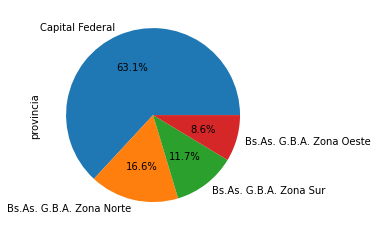

In [13]:
provincias.plot.pie(autopct='%1.1f%%')

En éstos gráficos se observa que una gran cantidad de los anuncios corresponde a la Capital Federal y también que se distinguen algunos barrios de forma pronunciada en relación a otros.

En lo que sigue se empezará a realizar un filtrado de los datos. En principio nos quedaremos con los anuncios que corresponden a la Capital Federal y cuyo tipo de propiedad es Departamento, Casa o PH. 

In [14]:
df= df[(df.property_type.isin(['Departamento', 'Casa','PH'])) & (data.l2== 'Capital Federal')]
df.head()


,provincia,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [15]:
df.shape

(91485, 9)

Con este primer filtro nos hemos quedado con un 62.37% de nuestros datos iniciales. 

Continuando con el análisis de nuestros datos, veremos un resúmen de los estadísticos más relevantes.

In [16]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


En esta tabla se pueden observar algunos puntos interesantes:
    
1. Siguen existiendo valores faltantes en las columnas bathrooms, surface_total y surface_covered.
2. La media por columna parece que toma valores coherentes. Sin embargo, sabiendo que es una medida de tendencia central poco robusta quizás nos este ocultando algo de información.
3. La desviación estándar presenta valores muy elevados para las tres variables, por lo cuál tenemos datos muy dispersos y seguramente muchos outliers.
4. En los mínimos: Tenemos propiedades con surface_total y surface_covered muy bajas.
5. En los cuartíles: Se observa un cambio brusco en las variables entre el 50% y el 75%. Lo cual también evidencia valores atípicos.
6. En los máximos: Se evidencia de manera clara que existen outliers.

Todas estas observaciones serán tomandas en cuenta en lo que sigue para realizar un buen filtrado de nuestros datos con el fin de encontrar cuáles serían las variables que nos servirán para predecir el valor del precio de una vivienda a través de un modelo Machine Learning.

    
    

En este punto se usará como aliado los boxplots que nos permiten visualizar de forma fácil la distribución de nuestros datos.

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

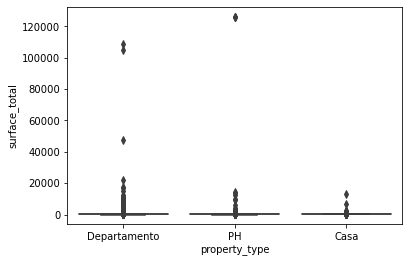

In [17]:
#Boxplot para property_type respecto a la variable surface_total 
sns.boxplot(x=df["property_type"],y=df["surface_total"])


Se filtrarán los valores de la superficie total para valores menores a 1000m2 y mayores a 10m2

<AxesSubplot:xlabel='property_type', ylabel='surface_total'>

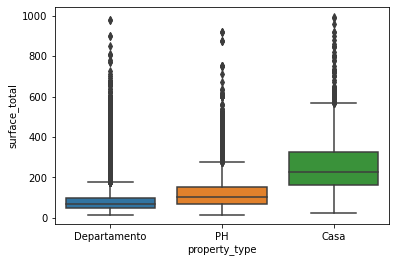

In [18]:
df=df[(df.surface_total <1000)]
df=df[(df.surface_total >15)]
sns.boxplot(x=df["property_type"],y=df["surface_total"])

Se puede apreciar que aún existen valores alejados de la media, sin embargo, 1000m2 es un número considerable para la superficie total de casas por lo que mantendremos éstos límites.

Ahora, para que los datos sean mas congruentes se tomarán las instancias donde la superficie total sea estrictamente mayor a la superfie cubierta.

In [19]:
mascara= (df.surface_total > df.surface_covered)
df=df[mascara]
df.shape

(56550, 9)

Veamos la distribución de la variable price

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

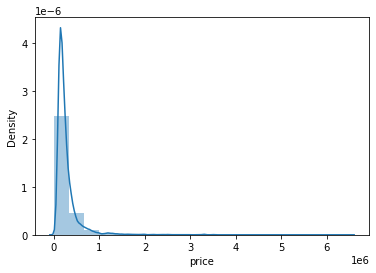

In [20]:
sns.distplot(df['price'], bins = 20)

Se observa una densidad de distribución muy ajustada y corrida hacia la izquierda, lo cual implica que tenemos valores muy elevados para esta variable. Por lo que consideraremos tomar como límite superior propiedades con precios menores a 700.000$

<AxesSubplot:xlabel='property_type', ylabel='price'>

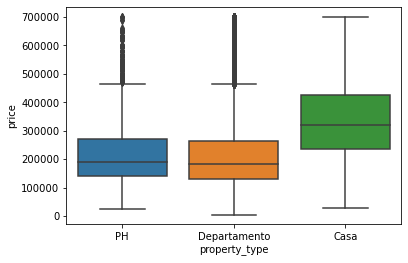

In [21]:
df=df[(df.price <700000)]
sns.boxplot(x=df["property_type"],y=df["price"])

Adicional a ésto y valiendonos de nuestros conocimientos podríamos considerar quedarnos con propiedades que posean menos de 8 ambientes, menos de 7 habitaciones y menos de 5 baños.

<AxesSubplot:xlabel='property_type', ylabel='rooms'>

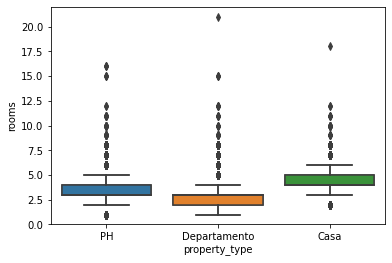

In [22]:
sns.boxplot(x=df["property_type"],y=df["rooms"])
#Realizamos un filtro 
df=df[(df.rooms <8)]
sns.boxplot(x=df["property_type"],y=df["rooms"])

<AxesSubplot:xlabel='property_type', ylabel='bedrooms'>

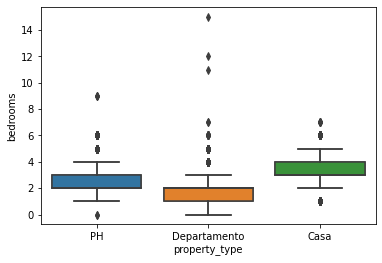

In [23]:
sns.boxplot(x=df["property_type"],y=df["bedrooms"])
#Realizamos un filtro 
df=df[(df.bedrooms <8)]
sns.boxplot(x=df["property_type"],y=df["bedrooms"])

<AxesSubplot:xlabel='property_type', ylabel='bathrooms'>

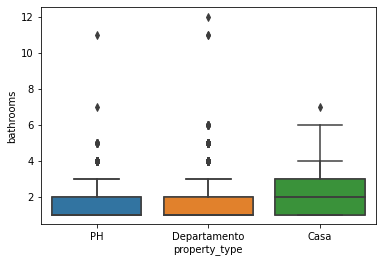

In [24]:
sns.boxplot(x=df["property_type"],y=df["bathrooms"])
#Realizamos un filtro 
df=df[(df.bathrooms <5)]
sns.boxplot(x=df["property_type"],y=df["bathrooms"])

Consideremos ahora eliminar valores faltantes

In [25]:
df.dropna()

,provincia,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...,...
146552,Capital Federal,Palermo,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento
146553,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


In [26]:
#Probamos que no existan valores nulos en nuestros datos.
df.isna().sum()
#df.shape

provincia          0
barrio             0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Después del filtrado de nuestro dataset, consideremos a continuación ver cómo se relacionan nuestras variables a través de un pairplot.

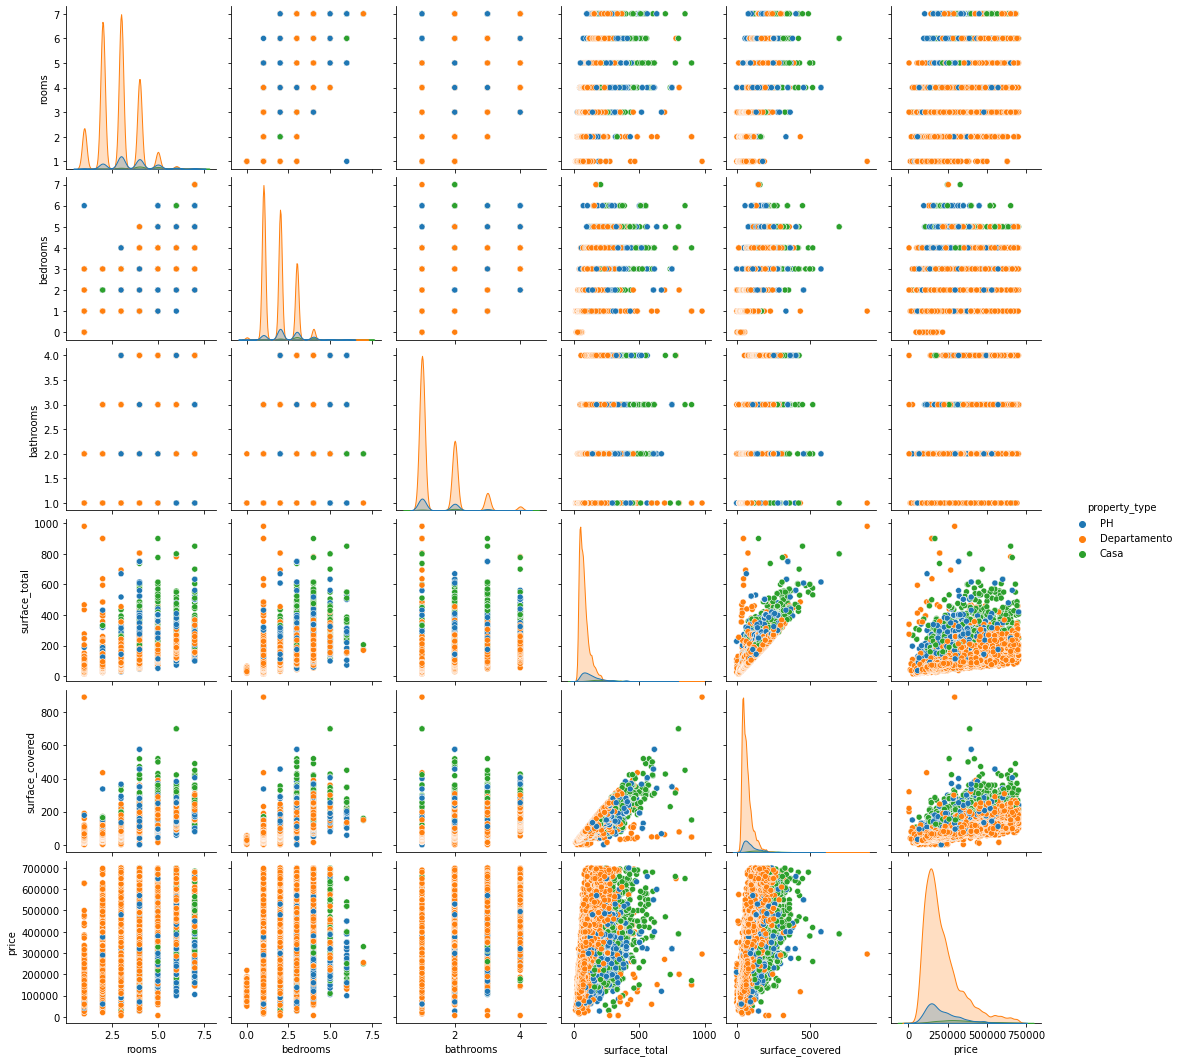

In [27]:
sns.pairplot(df, hue = 'property_type')

Encontramos que las variables rooms, bedrooms y bathrooms presentan relaciones bastante discretas con las demás variables y es difícil distinguir si a mayor cantidad de ambientes mayor sea el precio o no.
Después, se puede apreciar que parece existir una relación lineal entre las variables surface_total y surface_covered lo cual sería esperado.
Y por último, la relación entre price y surface_total nos muestra que podemos encontrar propiedades pequeñas pero con elevados precios. 

Como la intensión es predecir el valor de una vivienda, calculemos las correlaciones entre las variables y veamos cuáles nos podrían ayudar a realizar de forma óptima dicha predicción. 

In [28]:
#Estudio de correlaciones
corr=df.corr()
corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.936707,0.569980,0.690192,0.768816,0.595250
bedrooms,0.936707,1.000000,0.576925,0.678758,0.755316,0.575080
bathrooms,0.569980,0.576925,1.000000,0.529403,0.623924,0.651381
surface_total,0.690192,0.678758,0.529403,1.000000,0.897249,0.631193
surface_covered,0.768816,0.755316,0.623924,0.897249,1.000000,0.724929
price,0.595250,0.575080,0.651381,0.631193,0.724929,1.000000


In [29]:
type(df)

pandas.core.frame.DataFrame

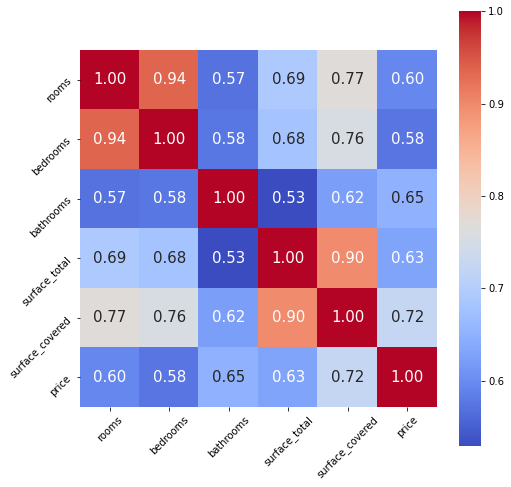

In [30]:
plt.figure(figsize=(8,8))
ax=sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Según la tabla de correlaciones obtenida, podemos observar que las variables que presentan mayor relación con el precio son los baños, la superficie total y la superficie cubierta. Siendo éstas probablemente las variables que mejor nos ayuden a predecir el precio de una propiedad.

* Explorando un poco más los datos, quisiera saber ¿Cuál es el barrio más económico en Capital Federal?. 

Para este agruparemos la variable price en 4 grupos. Estos grupos nos indicarán un rango de precios (alto, medio bajo, medio alto, bajo) y lo veremos para cada barrio.

In [31]:
#Estadísticos de la variable price
df.price.describe()

count     53127.000000
mean     219850.609746
std      121519.307348
min        6000.000000
25%      135000.000000
50%      185000.000000
75%      270000.000000
max      699999.000000
Name: price, dtype: float64

In [32]:
#Agrupar datos
#Creamos 4 grupos
bins=[6000,175000,350000,525000,700000]
nombres=['bajo','medio bajo','medio alto','alto']
df['rango_precio']=pd.cut(df['price'], bins, labels=nombres)
df

,provincia,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,rango_precio
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,bajo
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,medio bajo
8,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH,bajo
9,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH,bajo
10,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH,bajo
...,...,...,...,...,...,...,...,...,...,...
146552,Capital Federal,Palermo,4.0,2.0,3.0,159.0,98.0,539000.0,Departamento,alto
146553,Capital Federal,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,alto
146554,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,alto
146555,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,medio alto


In [33]:
#Vemos la cantidad de propiedades por barrio y por rango de precio.
precios_por_barrio= pd.crosstab(columns=df['rango_precio'], index= df['barrio'],margins= True)
precios_por_barrio.head()

rango_precio,bajo,medio bajo,medio alto,alto,All
barrio,,,,,
Abasto,107,141,5,2,255
Agronomía,75,41,2,3,121
Almagro,2277,2311,138,7,4733
Balvanera,897,344,21,1,1263
Barracas,190,219,53,3,465


In [34]:
precios_por_barrio=precios_por_barrio.sort_values(['bajo'], ascending=False)
precios_por_barrio.head()

rango_precio,bajo,medio bajo,medio alto,alto,All
barrio,,,,,
All,24725,21382,5169,1848,53124
Villa Crespo,2730,1214,145,9,4098
Palermo,2503,3816,1096,387,7802
Almagro,2277,2311,138,7,4733
Caballito,1781,1625,458,92,3956


Se pudiese concluir que los barrios más económicos para comprar una vivienda son Villa Crespo, Palermo, Almagro y Caballito. Sin embargo, estos resultados pueden contener ciertos errores. Por ejemplo, Palermo tiene también una gran cantidad de viviendas valoradas con precio medio alto y alto. Por lo que sería díficil concluir a partir de esto cuál es es barrio más económico.

Para mejorar la respuesta a ésta pregunta tendríamos que considerar otras variables que influyan en la valoración de una vivienda además de su ubicación.

### 3. Machine Learning

En esta sección, se entrenarán dos modelos Machine learning con el objetivo de predecir el precio de una vivienda basándonos en los resultados de nuestro análisis exploratorio previo. Para esto se realizará el filtrado de los datos sugerido en el enunciado del proyecto.

In [35]:
#Filtrado sugerido
df_ML=data[(data.property_type.isin(['Departamento', 'Casa','PH'])) & (data.l2== 'Capital Federal')]
df_ML=df_ML.drop(columns=['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'currency', 'title', 'description', 'operation_type'])

In [36]:
#Filtro de acuerdo al valor de superficie total
df_ML=df_ML[(df_ML.surface_total <1000)]
df_ML=df_ML[(df_ML.surface_total >15)]

In [37]:
#Filtro de acuerdo al precio
df_ML=df_ML[(df_ML.price <400000)]

In [38]:
#Elimino columnas con variables categóricas
df_ML=df_ML.drop(columns=['l2', 'l3', 'property_type'])

In [39]:
#Elimino NULLS
df_ML.dropna()
df_ML.isna().sum()

rooms                0
bedrooms             0
bathrooms          802
surface_total        0
surface_covered    476
price                0
dtype: int64

In [40]:
#Como me siguen apareciendo NULLS, los elimino de manera explícita
df_ML.drop(df_ML[df_ML.bathrooms.isnull()].index, inplace = True)
df_ML.drop(df_ML[df_ML.surface_covered.isnull()].index, inplace = True)

In [41]:
df_ML.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [42]:
df_ML.shape

(70303, 6)

Nos hemos quedado con un dataset que representa el 47.93% de nuestros datos originales

Para entrenar los modelos Machine Learning, separamos las variables predictoras (rooms, bedrooms, bathrooms, surface_total, surface_covered) de la variable a predecir (price). 

In [43]:
X=df_ML[['rooms', 'bedrooms','bathrooms','surface_total', 'surface_covered']]
y=df_ML.price
print(X)
print(y)

        rooms  bedrooms  bathrooms  surface_total  surface_covered
0         7.0       7.0        2.0          140.0            140.0
1         2.0       1.0        2.0           70.0             58.0
2         2.0       1.0        1.0           45.0             45.0
3         2.0       1.0        1.0           85.0             50.0
5         2.0       1.0        1.0           56.0             56.0
...       ...       ...        ...            ...              ...
146542    2.0       1.0        1.0           80.0             80.0
146543    3.0       2.0        2.0           85.0             81.0
146545    3.0       2.0        2.0           88.0             82.0
146549    3.0       2.0        1.0           84.0             84.0
146550    5.0       2.0        2.0          114.0             95.0

[70303 rows x 5 columns]
0         153000.0
1         159000.0
2         125000.0
3         295000.0
5         150000.0
            ...   
146542    170000.0
146543    225000.0
146545    399000.0

Realizamos ahora la división de nuestros datos, considerando un conjunto de datos de entrenamiento y otro de testeo.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 42)

En lo que sigue, se trabajará con dos modelos básicos de Machine Learning; Árbol de decisión y Vecinos más Cercanos, para predecir el precio de una propiedad basándonos en los resultados obtenidos en el desarrollo exploratorio previo.

Partiendo de que nuestra variable a predecir es numérica, usaremos la versión regresora de ambos modelos. Además se realizará el cálculo de dos métricas RMSE y R2 para evaluar cuán eficiente están trabajando nuestros modelos y poder concluir cuál de los dos nos da una predicción más certera.  

Se elije calcular la raíz del error cuadrático medio (RMSE) ya que es una métrica que nos presenta un error en las mismas unidades que la variable a predecir partiendo de comparar un valor predicho de uno real. Se espera encontrar que el modelo presente errores que tiendan a cero para que nuestros resultados sean más eficientes.  

Por otro lado, para garantizar aún mas la eficiencia de los modelos, calcularemos la métrica R2_score que es un coeficiente que nos permite determinar la capacidad de los modelos de predecir. Esperaremos que el valor de esta métrica tienda a 1 y de esta manera asegurar que nuestra predicción se aproxime a los valores reales de la variable objetivo.

1. Modelo Machine Learning: Árbol de decisión.
    

Empezamos por entrenar nuestra data considerando los valores por default de modelo.

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state = 42)

In [46]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Después de entrenar y predecir el modelo considero calcular las métricas para evaluar su eficacia. En este caso el RMSE y el R2_score.

In [48]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 31092.5996049439
Raíz del error cuadrático medio en Test: 45577.28358208427


C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


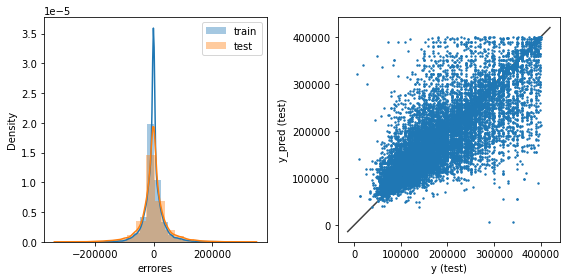

In [49]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
   
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
  ]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
   
plt.tight_layout()
plt.show()

Calculo ahora la segunda métrica elegida:

In [50]:
from sklearn.metrics import r2_score
print('Coeficiente de r2 para el árbol de decisión: %2f'
     %r2_score(y_test_pred, y_test))

Coeficiente de r2 para el árbol de decisión: 0.643772


Considerando que en nuestro análisis exploratorio encontramos que las variables predictoras que tienen mas correlación con el precio son bathrooms, surface_total y surface_covered. Veamos cómo son las importancias de nuestras variables basandonos en el modelo usado anteriormente.

C:\Users\vanes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


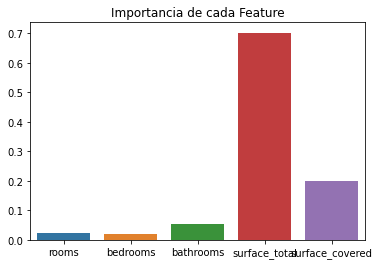

In [51]:
#IMPORTANCIAS
importances = tree_regressor.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

De esta forma es posible sugerir tomar como variables predictoras las que tienen más correlación con nuestra variable a precedir y además como lo indica el gráfico anterior presentan mayor importancia en nuestro modelo. Por lo que se decide continuar con sólo las variables barthrooms, surface_total y surface_covered. Ésto con la intensión de optimizar nuestros resultados.

In [52]:
df_ML=df_ML.drop(columns=['rooms', 'bedrooms'])

In [53]:
df_ML.head()

,bathrooms,surface_total,surface_covered,price
0,2.0,140.0,140.0,153000.0
1,2.0,70.0,58.0,159000.0
2,1.0,45.0,45.0,125000.0
3,1.0,85.0,50.0,295000.0
5,1.0,56.0,56.0,150000.0


Además, buscaremos optimizar los hiperparámetros de nuestro modelo de árbol de decisión variando el valor de la profundidad del mismo. Y a su vez observaremos cómo varían las métricas RMSE y R2 mientras cambiamos el parámetro max_depth.

Text(0, 0.5, 'RMSE')

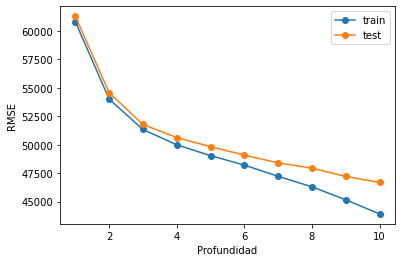

In [54]:
from sklearn.metrics import mean_squared_error
lista_rmse_train = []
lista_rmse_test = []

profundidad=[1,2,3,4,5,6,7,8,9,10]

for p in profundidad:
   
    tree_regressor = DecisionTreeRegressor(max_depth=p, random_state=42)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
         
    
plt.plot(profundidad, lista_rmse_train,'o-',label='train' )
plt.plot(profundidad, lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad')
plt.ylabel('RMSE') 

Se observa que existe una variación del error partiendo de RMSE entre los 60.000 y 45.000 USD. Los conjuntos de datos Train y Test presentan una variación similar, es decir, mientras más profundo sea el árbol menor es el error. Sin embargo, mientras mayor sea la profundidad empieza a existir mayor diferencia en los errores de los conjuntos para ésta métrica.

Veamos ahora cómo varía el R2.


Text(0, 0.5, 'R2 Score')

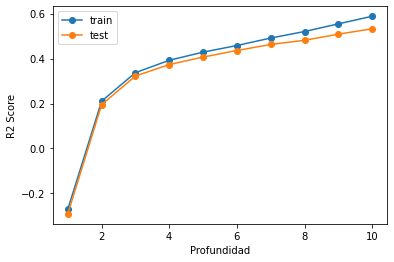

In [55]:
lista_r2_train= []
lista_r2_test= []
profundidad=[1,2,3,4,5,6,7,8,9,10]

for p in profundidad:
   
    tree_regressor = DecisionTreeRegressor(max_depth=p, random_state=42)
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    r2_arbol_train=r2_score(y_train_pred, y_train)
    lista_r2_train.append(r2_arbol_train)
    r2_arbol_test=r2_score(y_test_pred, y_test)
    lista_r2_test.append(r2_arbol_test)
    
plt.plot(profundidad, lista_r2_train,'o-',label='train' )
plt.plot(profundidad, lista_r2_test,'o-',label='test' )
plt.legend()
plt.xlabel('Profundidad')
plt.ylabel('R2 Score') 

Se observa que los valores del R2 aumentan mientras aumentamos la profundidad del árbol. Lo cual nos indica que a mayor profundidad es más efectiva nuestra predicción. Sin embargo, al igual que para el RMSE los valores de las métricas van siendo menos parecedidas para los conjuntos de Train y Test.

2. Modelo Machine Learning: Vecinos más cercanos.

Veamos ahora cómo es el desempeño utilizando el modelo de vecinos más cercanos. De igual forma que con el modelo de árboles buscaremos observar cómo son los valores de los errores utilizando RMSE y los valores del score R2 después de entrenar y predecir nuestros conjuntos de Train y Test. 

Text(0, 0.5, 'RMSE')

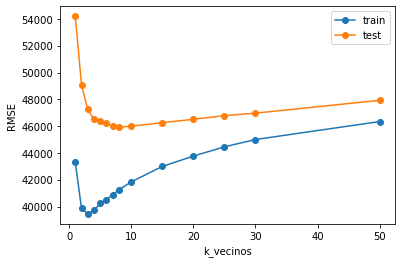

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
lista_rmse_train = []
lista_rmse_test = []
k_vecinos=[1,2,3,4,5,6,7,8,10,15,20,25,30,50]

for k in k_vecinos:
   
    knn_regressor = KNeighborsRegressor(k)
    knn_regressor.fit(X_train, y_train)
    
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)
    
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
    
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('k_vecinos')
plt.ylabel('RMSE') 

La variación del error para la métrica RMSE va desde los 40.000 a los 54.000 USD. De esta gráfica podrías decir que la cantidad de vecinos más óptima para el modelo está entre los 10 y 15 vecinos ya que vendría siendo donde los conjuntos de Train y Test presentan bajos errores y no tan diferentes entre ellos-

Observemos el comportamiento de la métrica R2_score

Text(0, 0.5, 'R2 Score')

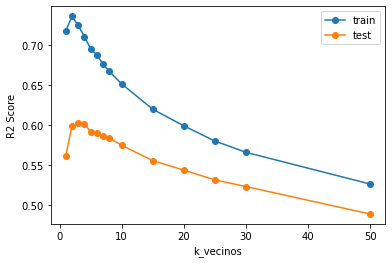

In [57]:
lista_r2_train= []
lista_r2_test= []
k_vecinos=[1,2,3,4,5,6,7,8,10,15,20,25,30,50]

for k in k_vecinos:
   
    knn_regressor = KNeighborsRegressor(k)
    knn_regressor.fit(X_train, y_train)
    
    y_train_pred = knn_regressor.predict(X_train)
    y_test_pred = knn_regressor.predict(X_test)
    
    r2_knn_train=r2_score(y_train_pred, y_train)
    lista_r2_train.append(r2_knn_train)
    r2_knn_test=r2_score(y_test_pred, y_test)
    lista_r2_test.append(r2_knn_test)
    
plt.plot(k_vecinos, lista_r2_train,'o-',label='train' )
plt.plot(k_vecinos, lista_r2_test,'o-',label='test' )
plt.legend()
plt.xlabel('k_vecinos')
plt.ylabel('R2 Score')

En este caso se observa que el valor del R2 disminuye mientras más vecinos son considerados. 

Consideremos ahora generar un modelo Benchmark para comparar nuestros resultados. Para esto tomaremos los mismos conjuntos Train y Test pero haremos predicciones basándonos en un modelo de Regresión Lineal y mostraremos sus métricas.

In [58]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [59]:
rmse_train_bench = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_bench = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_bench}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_bench}')

Raíz del error cuadrático medio en Train: 46341.27626849452
Raíz del error cuadrático medio en Test: 47926.72313456433


In [60]:
r2_reg_bench=r2_score(y_test_pred, y_test)
print(f'El valor del r2 score para el benchmark: {r2_reg_bench}')

El valor del r2 score para el benchmark: 0.48844265213935


Se observa que los errores para el RMSE de este modelo son bajos y difieren por poco los del conjunto Train y el Test. Por otro lado, el valor del R2 score es muy bajo.

Después de la optimización realizada consideremos trabajar con un modelo de árbol de decisión con una profundidad igual a 8 y un modelo de vecinos cercanos con k=10. Y observemos los valores de las métricas de cada modelo incluyendo nuestro modelo base de regresión lineal.


In [61]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=10)

In [62]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 57286.503331446496
Raíz del error cuadrático medio en Test: 57958.02304694553
El valor del r2 score : -0.024112169999560784


C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


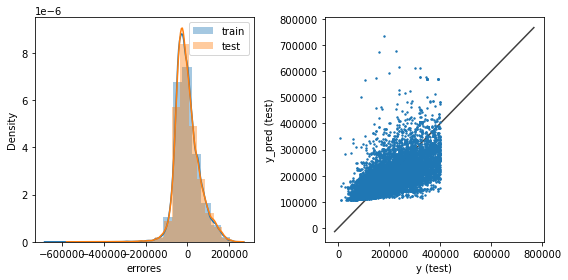

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 46297.291604909944
Raíz del error cuadrático medio en Test: 47935.92127722698
El valor del r2 score : 0.48153949920174544


C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


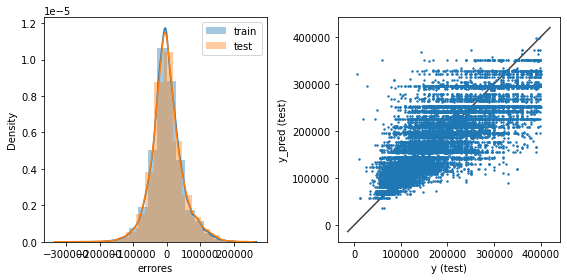

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 41839.17973499695
Raíz del error cuadrático medio en Test: 45999.04402686333
El valor del r2 score : 0.5744534826758614


C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


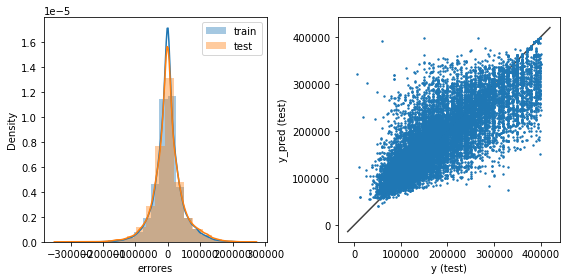

In [63]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    r2=r2_score(y_test_pred, y_test)
    print(f'El valor del r2 score : {r2}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### 3.Conclusiones

* Se puede concluir en base a los resultados que el mejor modelo la predecir el precio de una propiedad en la Ciudad de Buenos Aires sea el de vecinos cercanos que presentan un R2_score mas alto y errores RMSE bajos.  
* Sin embargo, se pudiese optimizar más este analisis considerando no eliminar de forma radical valores faltantes ya que nos dejan con un dataset mucho mas pequeño que el original.
* También se podrían considerar otras alternativas de filtrado que nos ayuden a mejorar los valores de nuestras métricas.

Nota: Para llegar a estos últimos resultados consideré trabajar con diferente cantidad de variables predictoras, cambié en varias ocasiones las cotas de los filtrados por atributos y sin embargo no logré conseguir mejorar los valores del R2_score. Si tienen alguna sugerencia con la que pueda mejorar mis predicciones estaré atenta a sus comentarios. 
Muchas gracias.